In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

C:\Users\ellui\AppData\Local\Temp\ipykernel_9584\930725367.py:5: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(Measurement.date)).scalar()
recent_date

'2017-08-23'

2016-08-23


<Figure size 1000x700 with 0 Axes>

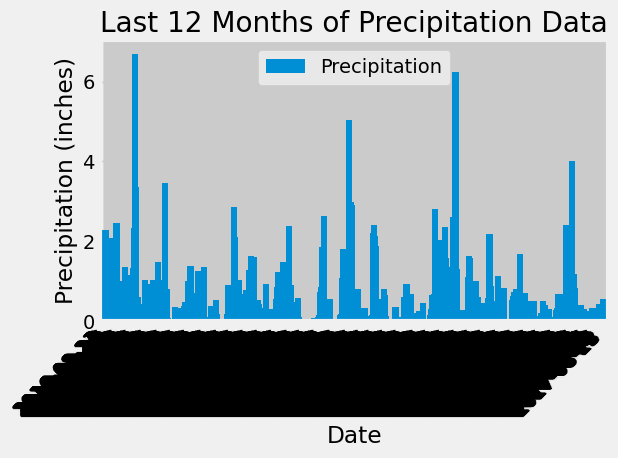

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
a_year_ago = dt.date(2017,8,23) - dt.timedelta(days= 365)
print(a_year_ago)

# Perform a query to retrieve the data and precipitation scores
prec_scores = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= a_year_ago, Measurement.prcp != None).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(prec_scores, columns=['Date', 'Precipitation'])
df.head()
# Sort the dataframe by date
df.set_index('Date', inplace=True)
df.head()

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 7))
df.plot(y='Precipitation', kind='bar', width=25, alpha=1.0, align='center', label='Precipitation')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.title('Last 12 Months of Precipitation Data')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.legend()
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = df['Precipitation'].describe()
summary_stats
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
num_stations = session.query(func.count(Station.station)).scalar()
num_stations

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active = session.query(Measurement.station, func.count(Measurement.station).label('activity_count')).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
temp_stats
 

[(54.0, 85.0, 71.66378066378067)]

(0.0, 70.0)

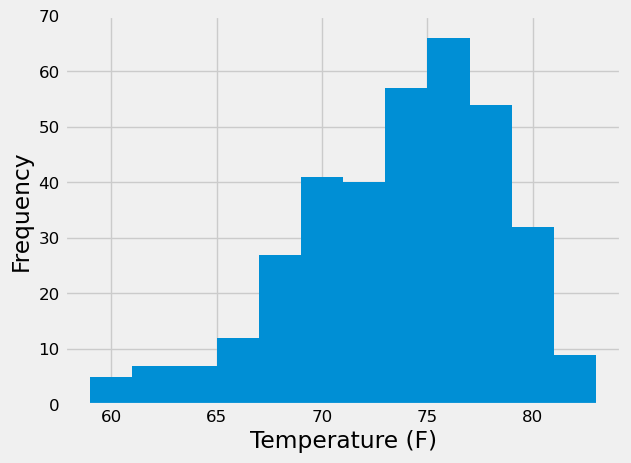

In [15]:
# Using the most active station id
#USC00519281#
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12_mon = session.query(Measurement.date,Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date > '2016-08-17').all()
#last_12_mon
# Creation of DataFrame to help with Histogram
last_12_mon_df = pd.DataFrame(last_12_mon)["tobs"]
last_12_mon_df
# Histogram:
hist = last_12_mon_df.hist(bins=12) 
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,70)

# Close Session

In [16]:
# Close Session
session.close()